### Step 1: Loading the Olympic Medalists dataset.

In [1]:
import pandas as pd 

#Loading the dataset:
df = pd.read_csv("olympics_08_medalists.csv")

#Displaying the first few rows:
df.head()

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 2: Understanding the data structure.

In [2]:
#Checking data types and missing values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   medalist_name                 1875 non-null   object
 1   male_archery                  11 non-null     object
 2   female_archery                9 non-null      object
 3   male_athletics                85 non-null     object
 4   female_athletics              81 non-null     object
 5   male_badminton                12 non-null     object
 6   female_badminton              10 non-null     object
 7   male_baseball                 72 non-null     object
 8   male_basketball               35 non-null     object
 9   female_basketball             36 non-null     object
 10  male_boxing                   44 non-null     object
 11  male_canoeing and kayaking    53 non-null     object
 12  female_canoeing and kayaking  21 non-null     object
 13  male_road bicycle 

In [3]:
#Listing the column names:
df.columns

Index(['medalist_name', 'male_archery', 'female_archery', 'male_athletics',
       'female_athletics', 'male_badminton', 'female_badminton',
       'male_baseball', 'male_basketball', 'female_basketball', 'male_boxing',
       'male_canoeing and kayaking', 'female_canoeing and kayaking',
       'male_road bicycle racing', 'female_road bicycle racing',
       'male_track cycling', 'female_track cycling', 'male_mountain biking',
       'female_mountain biking', 'male_bmx', 'female_bmx', 'male_diving',
       'female_diving', 'female_equestrian sport', 'male_equestrian sport',
       'male_fencing', 'female_fencing', 'male_field hockey',
       'female_field hockey', 'male_association football',
       'female_association football', 'male_artistic gymnastics',
       'female_artistic gymnastics', 'female_rhythmic gymnastics',
       'male_trampoline gymnastics', 'female_trampoline gymnastics',
       'male_handball', 'female_handball', 'male_judo', 'female_judo',
       'male_modern penta

### Step 3: Reshaping the data.

In [4]:
#Converting the current "wide" column format into "long" format:
df_melted = df.melt(id_vars=["medalist_name"],
                    var_name="sport_gender",
                    value_name="medal")
#Outputting the result:
df_melted.head()


,medalist_name,sport_gender,medal
0,Aaron Armstrong,male_archery,NaN
1,Aaron Peirsol,male_archery,NaN
2,Abdullo Tangriev,male_archery,NaN
3,Abeer Abdelrahman,male_archery,NaN
4,Abhinav,male_archery,NaN


In [5]:
#Removing the empty rows where an athlete did not win a medal in the sport:
df_melted = df_melted.dropna(subset=["medal"])

#Outputting the result:
df_melted.head()

,medalist_name,sport_gender,medal
177,Bair Badënov,male_archery,bronze
676,Ilario Di Buò,male_archery,silver
682,Im Dong-hyun,male_archery,gold
760,Jiang Lin,male_archery,bronze
920,Lee Chang-hwan,male_archery,gold


In [6]:
#Separating "sport_gender" into two columns:
df_melted[["gender", "sport"]] = df_melted["sport_gender"].str.split("_", n = 1, expand = True)
df_melted = df_melted.drop(columns = ["sport_gender"])

#Outputting the result:
df_melted.head()

,medalist_name,medal,gender,sport
177,Bair Badënov,bronze,male,archery
676,Ilario Di Buò,silver,male,archery
682,Im Dong-hyun,gold,male,archery
760,Jiang Lin,bronze,male,archery
920,Lee Chang-hwan,gold,male,archery


### Step 4: Converting each observational unit (medalist, sport, and results) into its own table.

#### Medalist Table

In [7]:
#Medalist table:
#First we have to drop any duplicate medalist names since the athletes may have won more than one medal:
medalist_table = df[["medalist_name"]].drop_duplicates()

#Next, we need to assign a unique identifier to each athlete:
medalist_table["medalist_id"] = medalist_table.groupby("medalist_name").ngroup() + 1

#Finally, we need to reorder the columns so that IDs come first in the table:
medalist_table = medalist_table[["medalist_id", "medalist_name"]]

#Outputting the result:
medalist_table.head()

,medalist_id,medalist_name
0,1,Aaron Armstrong
1,2,Aaron Peirsol
2,3,Abdullo Tangriev
3,4,Abeer Abdelrahman
4,5,Abhinav


In [9]:
#Now, we can add gender to the table to make it more comprehensive and helpful:
#From our melted df we can extract the medalists names and genders (using .drop_duplicates() to make sure each medalist only appears once):
medalist_table = df_melted[['medalist_name', 'gender']].drop_duplicates()
#Now we give each medalist a unique ID:
medalist_table['medalist_id'] = range(1, len(medalist_table) + 1)
#Make sure medalist ID is the first column in our table:
medalist_table = medalist_table[['medalist_id', 'medalist_name', 'gender']]
#Reset the index so that it is in order:
medalist_table = medalist_table.reset_index(drop=True)
#Outputting the result:
medalist_table.head()

,medalist_id,medalist_name,gender
0,1,Bair Badënov,male
1,2,Ilario Di Buò,male
2,3,Im Dong-hyun,male
3,4,Jiang Lin,male
4,5,Lee Chang-hwan,male


#### Sport Table

In [10]:
#Sport table (using similar methods):
sport_table = df_melted[['sport']].drop_duplicates().reset_index(drop=True)
sport_table['sport_id'] = range(101, 101 + len(sport_table))
sport_table = sport_table[['sport_id','sport']]

#Outputting the result:
sport_table.head()

,sport_id,sport
0,101,archery
1,102,athletics
2,103,badminton
3,104,baseball
4,105,basketball


#### Medals (Results) Table

In [11]:
#Merge our medalist table with our sports table with medalist_name as the "foreign key":
df_medals = df_melted.merge(medalist_table[['medalist_name', 'medalist_id']], on='medalist_name',how='left')

#Medalist ID is our primary key, so we move it to the front of the table:
df_medals = df_medals[['medalist_id', 'medalist_name', 'medal', 'sport']]

#Output the result:
df_medals.head()


,medalist_id,medalist_name,medal,sport
0,1,Bair Badënov,bronze,archery
1,2,Ilario Di Buò,silver,archery
2,3,Im Dong-hyun,gold,archery
3,4,Jiang Lin,bronze,archery
4,5,Lee Chang-hwan,gold,archery


### Step 5: Visualizing the newly cleaned data.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Medal Count by Gender:

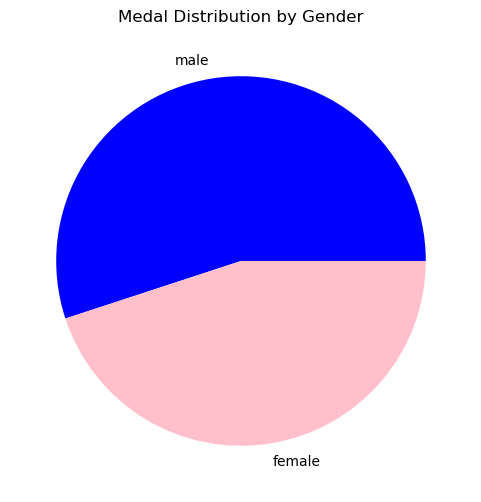

In [13]:
#First count the medals awarded to each gender:
gender_medal_counts = df_melted['gender'].value_counts()

#Then create the pie chart:
plt.figure(figsize=(6, 6))
plt.pie(gender_medal_counts, labels=gender_medal_counts.index, colors=['blue', 'pink'])
plt.title("Medal Distribution by Gender")
plt.show()


#### Medal Counts by Sport:

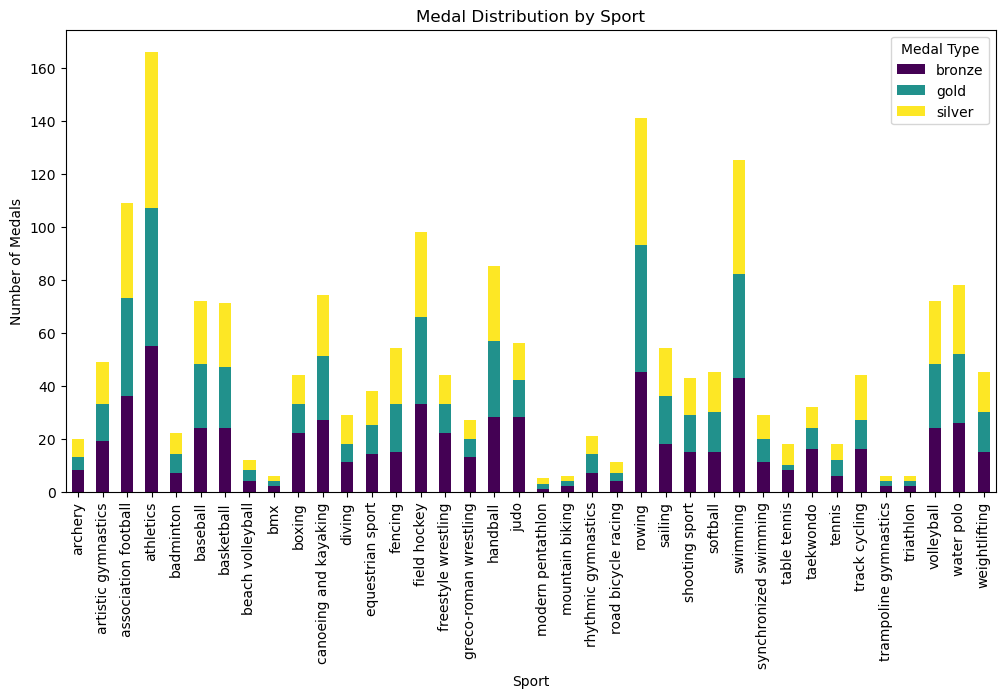

In [14]:
#First count the medals earned in each sport. "Unstacking" them ensures that each medal type is its own column:
medal_counts = df_melted.groupby(["sport", "medal"]).size().unstack()

#Then create the stacked bar chart:
medal_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.xlabel("Sport")
plt.ylabel("Number of Medals")
plt.title("Medal Distribution by Sport")
plt.legend(title="Medal Type")
plt.show()

#### Type of Medal by Gender:

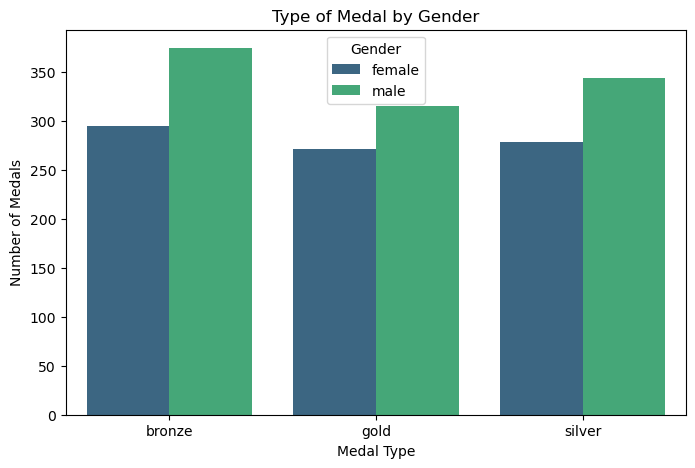

In [15]:
#First count the number of bronze, silver, and gold medals awarded to each gender:
medal_counts = df_melted.groupby(["gender", "medal"]).size().reset_index(name="count")

#Then create the grouped bar chart:
plt.figure(figsize=(8, 5))
sns.barplot(data=medal_counts, x="medal", y="count", hue="gender", palette="viridis")
plt.xlabel("Medal Type")
plt.ylabel("Number of Medals")
plt.title("Type of Medal by Gender")
plt.legend(title="Gender")

plt.show()

### Step 6: Pivot Tables

#### Aggregate Medal Count by Sport

In [17]:
#Create pivot table to count the total medals awarded in each sport, grouping data by the "sport" column:
medals_total = df_melted.pivot_table(index='sport', values='medal', aggfunc='count').reset_index()
#Renaming the "medal" column for aesthetics and clarity:
medals_total.rename(columns={'medal':'Total Medals'}, inplace=True)
#Outputting the result:
medals_total.head()

,sport,Total Medals
0,archery,20
1,artistic gymnastics,49
2,association football,109
3,athletics,166
4,badminton,22


#### Aggregate Medal Count by Sport and Type

In [18]:
#Create pivot table to count the number of each medal type awarded per sport, grouping data by "sport" column, AND reset the index to keep a clean structure:
medal_types_by_sport = df_melted.pivot_table(index='sport', columns='medal', values='medalist_name', aggfunc='count').fillna(0).reset_index()
#Outputting the result:
medal_types_by_sport.head()


medal,sport,bronze,gold,silver
0,archery,8,5,7
1,artistic gymnastics,19,14,16
2,association football,36,37,36
3,athletics,55,52,59
4,badminton,7,7,8
